<a href="https://colab.research.google.com/github/ZeroOFBright/Race-Detection-using-CNN-/blob/main/Race_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open CV

In [1]:
import cv2
from cv2 import imread
from google.colab.patches import cv2_imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle

print(cv2.__version__)

4.1.2


In [ ]:
# load the pre-trained model
classifier = CascadeClassifier('/content/drive/MyDrive/DL/code/haarcascade/haarcascade_frontalface_default.xml')

In [ ]:
# load the photograph
pixels = imread('/content/drive/MyDrive/DL/dataset/train/chinese/f-039-01.jpg')

In [ ]:
pixels

In [ ]:
# perform face detection
bboxes = classifier.detectMultiScale(pixels)
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1 )

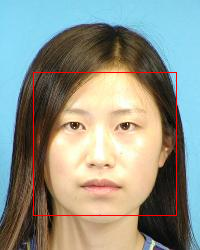

In [ ]:
# show the image
cv2_imshow(pixels)

In [ ]:
len(bboxes)

4

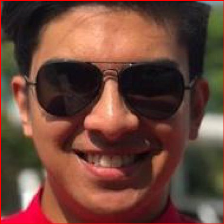

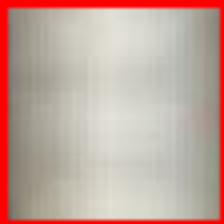

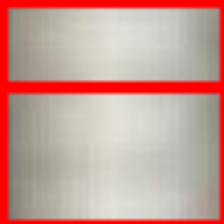

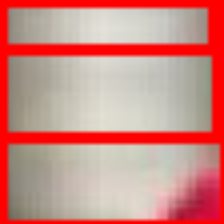

In [ ]:
pixels = imread('/content/drive/MyDrive/DL/dataset/clean_data/test/malaysia/m03.jpg')
# perform face detection
bboxes = classifier.detectMultiScale(pixels, 1.05, 8)  #SCALE DOWN PICTURE TO 1.05 default = 1.1   8 = min_neighbor
for box in bboxes:
	# extract
	x, y, width, height = box
	x2, y2 = x + width, y + height
	# draw a rectangle over the pixels
	rectangle(pixels, (x, y), (x2, y2), (0,0,255),2)
	face = pixels[y:y+height,x:x+width]
	resize = cv2.resize(face,(224,224))
	cv2_imshow(resize)
 
# show the image
#cv2_imshow(pixels)

**Crop pics that have only face and save to the folder**

In [ ]:
def crop_image(pic):
  pixels = imread(pic)
  pic_jpg = str(pic)
  if ("png" in str(pic)):
    pic_jpg = pic.replace("png","jpg")
  elif ("jfif" in str(pic)):
    pic_jpg = pic.replace("jfif","jpg")

  save_path = r"/content/drive/MyDrive/DL/dataset/clean_data/validation/chinese_cropface/" + pic_jpg

  bboxes = classifier.detectMultiScale(pixels, 1.05, 8)  #SCALE DOWN PICTURE TO 1.05 default = 1.1   8 = min_neighbor
  if(len(bboxes) > 0):
    box = bboxes[0]
    x, y, width, height = box
    x2, y2 = x + width, y + height
    face = pixels[y:y+height,x:x+width]
    resize = cv2.resize(face,(224,224))
    cv2.imwrite(save_path,resize)


In [12]:
import os , glob
import cv2 

source_directory = r"/content/drive/MyDrive/DL/dataset/clean_data/validation/chinese"

os.chdir(source_directory)

for file in glob.glob("*"):
  crop_image(file)

# Data Augmentation

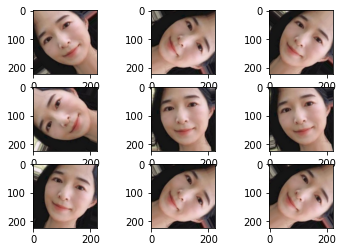

In [4]:
# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt

# load the image
img = load_img('/content/drive/MyDrive/DL/Data Augment/china/-Mandarin-tutor-in-Dubai-5f4f4d2f029f4.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [5]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
def augment(pic):
    img = load_img(pic)
    save_path = "/content/drive/MyDrive/DL/for train 3/train/chinese"
    # convert to numpy array
    data = img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(rotation_range=90)
    # prepare iterator
    #it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for x,val in zip(datagen.flow(samples,save_to_dir=save_path,save_prefix="aug"+str(pic[:-4]) ),range(9)) :
      pass


In [7]:
import os , glob
import cv2 

source_directory = r"/content/drive/MyDrive/DL/for train 3/test/chinese"     #/content/drive/MyDrive/DL/for train 3/for augment/chinese_train
  
os.chdir(source_directory)

for file in glob.glob("*"):
  #print(file)
  augment(file)

**Count number of Images**

In [ ]:
import os ,os.path
dir = "/content/drive/MyDrive/DL/for train 3/test/chinese"
count_file = os.listdir(dir)
number_files = len(count_file)
print(number_files)   # train  thai 405 #malay 404 china 404      validation thai 99 malaysia 101  chinese 84      test  99/101/76

76


# PRE PROCESS

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()  



In [ ]:
data_dir = "/content/drive/MyDrive/DL/for train 3"
TRAIN = "train"
VAL = "validation"
TEST = "test"

#resize image
data_transforms = {
    TRAIN: transforms.Compose([
        #transforms.Resize(256),   
        transforms.CenterCrop(224),     
        transforms.RandomHorizontalFlip(),                  
        #transforms.Grayscale(),
        transforms.ToTensor(),
        #transforms.Normalize(0.5,0.5)
    ]),
    VAL: transforms.Compose([
        #transforms.Resize(256),
        transforms.CenterCrop(224),
        #transforms.Grayscale(),
        transforms.ToTensor(),
        #transforms.Normalize(0.5,0.5)
    ]),
    TEST: transforms.Compose([
        #transforms.Resize(256),
        transforms.CenterCrop(224),
        #transforms.Grayscale(),
        transforms.ToTensor(),
        #transforms.Normalize(0.5,0.5)
    ])
}


image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x), 
        transform=data_transforms[x]
    )
    for x in [TRAIN, VAL, TEST]
}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8,
                                             shuffle=True, num_workers=1)
              for x in [TRAIN, VAL,TEST]}


dataset_sizes = {x: len(image_datasets[x]) for x in [TRAIN, VAL, TEST]}

for x in [TRAIN, VAL, TEST]:
    print("Loaded {} images under {}".format(dataset_sizes[x], x))
    
print("Classes: ")
class_names = image_datasets[TRAIN].classes
print(image_datasets[TRAIN].classes)



Loaded 12124 images under train
Loaded 284 images under validation
Loaded 276 images under test
Classes: 
['chinese', 'malaysia', 'thai']


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

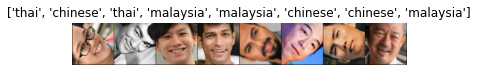

torch.Size([8, 3, 224, 224])


In [ ]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    # plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(dataloaders[TRAIN]))
show_databatch(inputs, classes)
print(inputs.shape)

# VGG

In [ ]:
path = "/content/drive/MyDrive/DL/code/vgg-16/vgg-16_weight_v6.pth"
load_weight = False
if os.path.exists(path):
  print("load weight")
  model= models.vgg16()
  load_weight = True
else:
  print("pretrain")
  model =  models.vgg16(pretrained=True)

for param in model.parameters():
  param.requires_grad = False

num_ftrs = model.classifier[6].in_features

#print(model_vgg)

features = list(model.classifier.children())[:-1] # Remove last layer
features.extend(  [nn.Linear(num_ftrs, 256),nn.Dropout(p=0.5),nn.Linear(256,len(class_names)),nn.Softmax(dim=1) ]  ) # Add our layer with 3 outputs   #            nn.Linear(num_ftrs, len(class_names))
model.classifier = nn.Sequential(*features) # Replace the model classifier

if load_weight:
  weight = torch.load(path)
  model.load_state_dict(weight)
  load_weight = False


pretrain


In [ ]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Resnet-18

**Gray Scale**

In [ ]:
path = "/content/drive/MyDrive/DL/code/resnet-18/resnet-18_baseline_dropout_gray.pth"


load_weight = False
if os.path.exists(path):
  print("load weight")
  model = models.resnet18()

  load_weight = True
else:
  model =  models.resnet18(pretrained=True)
 
  print("pretrain")

for param in model.parameters():
  param.requires_grad = False

num_ftrs = model.fc.in_features
features = list(model.fc.children())[:-1] # Remove last layer
#print(features)
features.extend([nn.Flatten(),nn.Linear(num_ftrs, 256),nn.ReLU(),nn.Dropout(p=0.5),nn.Linear(256,len(class_names)),nn.Softmax(dim=1) ]) # Add our layer with 3 outputs
#features = [nn.Linear(num_ftrs, 256),nn.Dropout(p=0.8),nn.Linear(256,len(class_names)) ]  # Add our layer with 3 outputs
model.fc = nn.Sequential(*features) # Replace the model classifier

pre_layer = list(model.children())
pre_layer.insert(0,nn.Conv2d(1,3,kernel_size=3,stride=1,padding=1,bias=False))# change first layer dim to 1,64 for grayscale
model = nn.Sequential(*pre_layer)



if load_weight:
  weight = torch.load(path,map_location=torch)
  model.load_state_dict(weight)
  load_weight = False

# Observe that all parameters are being optimized

#optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

optimizer = optim.Adam(model.parameters(), lr=0.001,)

# Decay LR by a factor of 0.1 every 7 epochs
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

criterion = nn.CrossEntropyLoss()

model = model.to(device)

pretrain


In [ ]:
model

Sequential(
  (0): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (5): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

**RGB**

In [ ]:
path = "/content/drive/MyDrive/DL/code/resnet-18/resnet-18_weight_v19.pth"
load_weight = False
if os.path.exists(path):
  print("load weight")
  model = models.resnet18()

  for param in model.parameters():
    param.requires_grad = False

  load_weight = True
else:
  model =  models.resnet18(pretrained=True)
  for param in model.parameters():
    param.requires_grad = False
  print("pretrain")



num_ftrs = model.fc.in_features
features = list(model.fc.children())[:-1] # Remove last layer
#features.extend([nn.Linear(num_ftrs, 256),nn.ReLU(),nn.Linear(256,len(class_names)),nn.Softmax(dim=1) ]) # Add our layer with 3 outputs  #
features.extend([nn.Linear(num_ftrs, 256),nn.ReLU(),nn.Dropout(p=0.5),nn.Linear(256,len(class_names)),nn.Softmax(dim=1) ]) # Add our layer with 3 outputs  #

model.fc = nn.Sequential(*features) # Replace the model classifier


if load_weight:
  weight = torch.load(path)
  model.load_state_dict(weight)
  load_weight = False



load weight


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Race_CNN

In [ ]:
import torch.nn as nn
from torch.nn.functional import relu,softmax
import torch

In [ ]:
class Race_CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,64,3,stride=1,padding=1)
    self.maxPool1 = nn.MaxPool2d(2,2) #112*112
    self.conv2 = nn.Conv2d(64,128,3,stride=1,padding=1)
    self.maxPool2 = nn.MaxPool2d(2,2) #56*56
    self.conv3 = nn.Conv2d(128,256,3,stride=1,padding=1)
    self.maxPool3 = nn.MaxPool2d(2,2) #28*28
    self.conv4 = nn.Conv2d(256,512,3,stride=1,padding=1)
    self.maxPool4 = nn.MaxPool2d(2,2) #14*14
    self.conv5 = nn.Conv2d(512,1024,3,stride=1,padding=1)
    self.maxPool5 = nn.MaxPool2d(2,2) #7*7
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(7*7*1024,512)
    self.dropout1 = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(512,256)
    self.dropout2 = nn.Dropout(p=0.5)
    self.fc3 = nn.Linear(256,3)


  def forward(self,x):
    x = relu(self.conv1(x))
    x = self.maxPool1(x)
    x = relu(self.conv2(x))
    x = self.maxPool2(x)
    x = relu(self.conv3(x))
    x = self.maxPool3(x)
    x = relu(self.conv4(x))
    x = self.maxPool4(x)
    x = relu(self.conv5(x))
    x = self.maxPool5(x)
    x = self.flatten(x)
    x = relu(self.fc1(x))
    x = self.dropout1(x)
    x = relu(self.fc2(x))
    x = self.dropout2(x)
    x = self.fc3(x)    
    x = softmax(x)
    return x 


    




In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
model = Race_CNN()
model = model.to(device)
model


Race_CNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxPool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=50176, out_features=512, bias=True)
  (dropout1): Dropout(p=0.8, inplace=False)

In [ ]:
data_dir = "/content/drive/MyDrive/DL/for train 2"
TRAIN = "train"
VAL = "validation"
TEST = "test"

#resize image
data_transforms = {
    TRAIN: transforms.Compose([
        transforms.Resize(250),   
        #transforms.CenterCrop(224),     
        transforms.RandomHorizontalFlip(),                  
        #transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize(0.5,0.5)
    ]),
    VAL: transforms.Compose([
        transforms.Resize(250),
        #transforms.CenterCrop(224),
        #transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize(0.5,0.5)
    ]),
    TEST: transforms.Compose([
        transforms.Resize(250),
        #transforms.CenterCrop(224),
        #transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize(0.5,0.5)
    ])
}


image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x), 
        transform=data_transforms[x]
    )
    for x in [TRAIN, VAL, TEST]
}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8,
                                             shuffle=True, num_workers=4)
              for x in [TRAIN, VAL,TEST]}


dataset_sizes = {x: len(image_datasets[x]) for x in [TRAIN, VAL, TEST]}

for x in [TRAIN, VAL, TEST]:
    print("Loaded {} images under {}".format(dataset_sizes[x], x))
    
print("Classes: ")
class_names = image_datasets[TRAIN].classes
print(image_datasets[TRAIN].classes)



Loaded 10702 images under train
Loaded 228 images under validation
Loaded 228 images under test
Classes: 
['chinese', 'malaysia', 'thai']


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Neha01 Architecture

In [ ]:
import torch.nn as nn
from torch.nn.functional import relu,softmax
import torch

In [ ]:
class Neha_Cnn(nn.Module):
  def __init__(self):
    super().__init__()

    #conv1    #224x224
    self.conv1_1 = nn.Conv2d(3,64,3) #222
    self.conv1_2 = nn.Conv2d(64,64,3) #220
    self.batchnorm1 = nn.BatchNorm2d(64)
    self.maxpooling1 = nn.MaxPool2d(2,2) #110
    self.dropout1 = nn.Dropout(p=0.5)

    #conv2
    self.conv2_1 = nn.Conv2d(64,64,3) #108
    self.conv2_2 = nn.Conv2d(64,64,3) #106
    self.batchnorm2 = nn.BatchNorm2d(64)
    self.maxpooling2 = nn.MaxPool2d(2,2) #53
    self.dropout2 = nn.Dropout(p=0.5)
    
    #conv3
    self.conv3_1 = nn.Conv2d(64,64,3) #51
    self.conv3_2 = nn.Conv2d(64,64,3) #49 
    self.batchnorm3 = nn.BatchNorm2d(64)
    self.maxpooling3 = nn.MaxPool2d(2,2)  #24

    self.flatten = nn.Flatten()

    #fully connected 
    self.fc1 = nn.Linear(24*24*64 ,1024)
    self.dropout_fc1 = nn.Dropout(0.2)
    self.fc2 = nn.Linear(1024,1024)
    self.dropout_fc2 = nn.Dropout(0.2)
    self.fc3 = nn.Linear(1024,3)
  
  def forward(self,x):
    x = relu(self.conv1_1(x))
    x = relu(self.conv1_2(x))
    x = self.batchnorm1(x)
    x = self.dropout1(self.maxpooling1(x))

    x = relu(self.conv2_1(x))
    x = relu(self.conv2_2(x))
    x = self.batchnorm1(x)
    x = self.dropout2(self.maxpooling2(x))

    x = relu(self.conv3_1(x))
    x = relu(self.conv3_2(x))
    x = self.batchnorm1(x)
    x = self.maxpooling3(x)

    x = self.flatten(x)

    x = relu(self.fc1(x))
    x = self.dropout_fc1(x)
    x = relu(self.fc2(x))
    x = self.dropout_fc2(x)
    x = softmax(self.fc3(x))

    return x 


In [ ]:
model = Neha_Cnn()

In [ ]:
model

Neha_Cnn(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpooling1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (conv2_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpooling2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (conv3_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpooling3): MaxPool2d(kernel_size=2, stride=2, p

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
model = model.to(device)


In [ ]:
data_dir = "/content/drive/MyDrive/DL/for train 2"
TRAIN = "train"
VAL = "validation"
TEST = "test"

#resize image
data_transforms = {
    TRAIN: transforms.Compose([
        transforms.Resize(256),   
        transforms.CenterCrop(224),     
        transforms.RandomHorizontalFlip(),                  
        #transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize(0.5,0.5)
    ]),
    VAL: transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        #transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize(0.5,0.5)
    ]),
    TEST: transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        #transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize(0.5,0.5)
    ])
}


image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x), 
        transform=data_transforms[x]
    )
    for x in [TRAIN, VAL, TEST]
}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8,
                                             shuffle=True, num_workers=4)
              for x in [TRAIN, VAL,TEST]}


dataset_sizes = {x: len(image_datasets[x]) for x in [TRAIN, VAL, TEST]}

for x in [TRAIN, VAL, TEST]:
    print("Loaded {} images under {}".format(dataset_sizes[x], x))
    
print("Classes: ")
class_names = image_datasets[TRAIN].classes
print(image_datasets[TRAIN].classes)



Loaded 10702 images under train
Loaded 228 images under validation
Loaded 228 images under test
Classes: 
['chinese', 'malaysia', 'thai']


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# RR-CNN

In [ ]:
import torch.nn as nn
from torch.nn.functional import relu,softmax
import torch

In [ ]:
class RR_CNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(3,32,3) #62
    self.maxpool1 = nn.MaxPool2d(2,2) #31

    self.conv2 = nn.Conv2d(32,32,3) #29
    self.maxpool2 = nn.MaxPool2d(2,2) #14

    self.conv3 = nn.Conv2d(32,32,3) #12
    
    self.conv4 = nn.Conv2d(32,64,3) #10

    self.maxpool4 = nn.MaxPool2d(2,2) #5

    self.flatten = nn.Flatten()

    self.fc1 = nn.Linear(5*5*64,1024)
    self.dropout1 = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(1024,512)
    self.dropout2 = nn.Dropout(p=0.5)
    self.fc3 = nn.Linear(512,3)

  def forward(self,x):
    x = relu(self.conv1(x))
    x = self.maxpool1(x)

    x = relu(self.conv2(x))
    x = self.maxpool2(x)

    x = relu(self.conv3(x))

    x = relu(self.conv4(x))
    x = self.maxpool4(x)

    x = self.flatten(x)
    x = relu(self.fc1(x))
    x = self.dropout1(x)

    x = relu(self.fc2(x))
    x = self.dropout2(x)

    x = softmax(self.fc3(x))

    return x


In [ ]:
model = RR_CNN()

In [ ]:
model

RR_CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (maxpool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1600, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=512, out_features=3, bias=True)
)

In [ ]:
from __future__ import print_function, division

import torch
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()  



In [ ]:
data_dir = "/content/drive/MyDrive/DL/for train 3"
TRAIN = "train"
VAL = "validation"
TEST = "test"

#resize image
data_transforms = {
    TRAIN: transforms.Compose([
        transforms.Resize(64),   
        #transforms.CenterCrop(224),     
        transforms.RandomHorizontalFlip(),                  
        #transforms.Grayscale(),
        transforms.ToTensor(),
        #transforms.Normalize(0.5,0.5)
    ]),
    VAL: transforms.Compose([
        transforms.Resize(64),
        #transforms.CenterCrop(224),
        #transforms.Grayscale(),
        transforms.ToTensor(),
        #transforms.Normalize(0.5,0.5)
    ]),
    TEST: transforms.Compose([
        transforms.Resize(64),
        #transforms.CenterCrop(224),
        #transforms.Grayscale(),
        transforms.ToTensor(),
        #transforms.Normalize(0.5,0.5)
    ])
}


image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x), 
        transform=data_transforms[x]
    )
    for x in [TRAIN, VAL, TEST]
}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8,
                                             shuffle=True, num_workers=4)
              for x in [TRAIN, VAL,TEST]}


dataset_sizes = {x: len(image_datasets[x]) for x in [TRAIN, VAL, TEST]}

for x in [TRAIN, VAL, TEST]:
    print("Loaded {} images under {}".format(dataset_sizes[x], x))
    
print("Classes: ")
class_names = image_datasets[TRAIN].classes
print(image_datasets[TRAIN].classes)



Loaded 12124 images under train
Loaded 284 images under validation
Loaded 276 images under test
Classes: 
['chinese', 'malaysia', 'thai']


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# Train Model

In [ ]:
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = model.to(device)

criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(),lr=0.001)
optimizer = optim.SGD(model.parameters(),lr=0.001,momentum=0.9,weight_decay=0.000001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


In [ ]:
def plot_loss(train_loss,validation_loss):
  plt.figure(figsize=(10,5))
  plt.plot(train_loss,label="train loss")
  plt.plot(validation_loss,label="validation loss ")
  plt.legend()
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.title("Train loss and Validation loss")
  plt.show()

def plot_acc(train_acc,validation_acc):
  plt.figure(figsize=(10,5))
  plt.plot(train_acc,label="train acc")
  plt.plot(validation_acc,label="validation acc")
  plt.legend()
  plt.xlabel("epoch")
  plt.ylabel("acc")
  plt.title("Train accuracy and Validation accuracy")
  plt.show()


In [ ]:

#path = "/content/drive/MyDrive/DL/race_cnn/RR_CNN_weight_v3"

print(path)

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    count = 0

    train_loss = []
    validation_loss = []

    train_acc = []
    validation_acc = []

    early_stop = False

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'validation']:


            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            if phase == "train" :
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc)
            else:
                validation_loss.append(epoch_loss)
                validation_acc.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'validation' and epoch_acc > best_acc:
                #print("epoch accuracy = ",epoch_acc)
                count = 0
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(best_model_wts,path)
            elif phase == 'validation' and epoch_acc <= best_acc:
                count += 1 
                print("Early Stopping Count = {}".format(count))
                if count == 10 :
                    early_stop = True
                    print("----------------------------- early stopping -----------------------------")

        if early_stop == True :
            print("Stop Trainning")
            break            


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    plot_loss(train_loss,validation_loss)
    plot_acc(train_acc,validation_acc)


    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

/content/drive/MyDrive/DL/code/resnet-18/resnet-18_baseline_augment_sgd.pth


Epoch 0/199
----------
train Loss: 0.9654 Acc: 0.5791
validation Loss: 0.8914 Acc: 0.6690
Epoch 1/199
----------
train Loss: 0.8895 Acc: 0.6524
validation Loss: 0.8913 Acc: 0.6303
Early Stopping Count = 1
Epoch 2/199
----------
train Loss: 0.8771 Acc: 0.6603
validation Loss: 0.8573 Acc: 0.6972
Epoch 3/199
----------
train Loss: 0.8631 Acc: 0.6774
validation Loss: 0.8493 Acc: 0.6901
Early Stopping Count = 1
Epoch 4/199
----------
train Loss: 0.8569 Acc: 0.6811
validation Loss: 0.8551 Acc: 0.6866
Early Stopping Count = 2
Epoch 5/199
----------
train Loss: 0.8540 Acc: 0.6857
validation Loss: 0.8486 Acc: 0.6937
Early Stopping Count = 3
Epoch 6/199
----------
train Loss: 0.8490 Acc: 0.6919
validation Loss: 0.8505 Acc: 0.6761
Early Stopping Count = 4
Epoch 7/199
----------
train Loss: 0.8432 Acc: 0.6971
validation Loss: 0.8491 Acc: 0.6796
Early Stopping Count = 5
Epoch 8/199
----------
train Loss: 0.8399 Acc: 0.6993
validation Loss: 0.8326 Acc: 0.7077
Epoch 9/199
----------
train Loss: 0.836

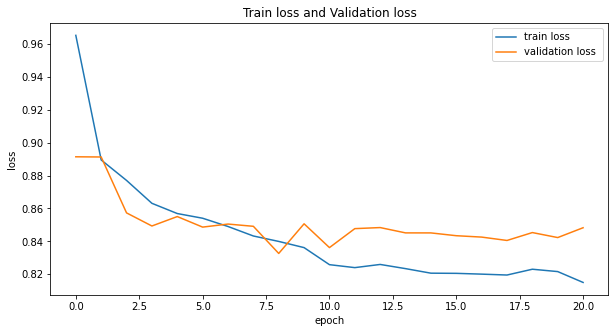

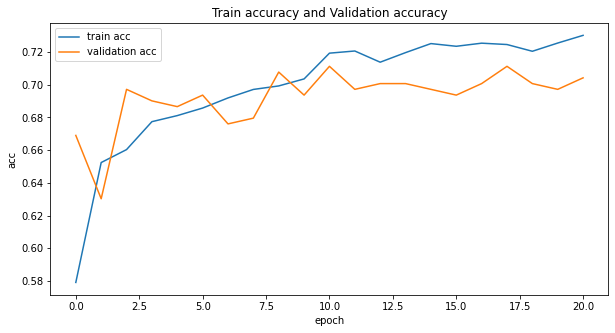

In [ ]:
model = train_model(model,criterion,optimizer,scheduler,200)

# Evaluate Model

In [ ]:
from sklearn.metrics import accuracy_score,classification_report


In [ ]:
def eval_model(model, criterion):

    list_label = []
    list_pred =  []
    since = time.time()
    avg_loss = 0
    avg_acc = 0
    loss_test = 0
    acc_test = 0

    test_batches = len(dataloaders[TEST])
    print("Evaluating model")
    print('-' * 10)
    
    for i, data in enumerate(dataloaders[TEST]):
       
        if i % 100 == 0:
            print("\rTest batch {}/{}".format(i, test_batches), end='', flush=True)

        model.train(False)

        model.eval()
        inputs, labels = data
        inputs, labels = inputs.cuda() , labels.cuda() #send the pic from CPU to GPU cause using cuda

        list_label.extend(labels.tolist())

        inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)

        #print(labels)

        outputs = model(inputs)

        _, preds = torch.max(outputs.data, 1)

        #print(preds)

        list_pred.extend(preds.tolist())

        loss = criterion(outputs, labels)

        loss_test += loss.item() * inputs.size(0)  
        acc_test += torch.sum(preds == labels.data)

        del inputs, labels, outputs, preds
        torch.cuda.empty_cache()
        
    avg_loss = loss_test / dataset_sizes[TEST]
    avg_acc = acc_test / dataset_sizes[TEST]
    
    elapsed_time = time.time() - since
    print()
    print("Evaluation completed in {:.0f}m {:.0f}s".format(elapsed_time // 60, elapsed_time % 60))
    print("Avg loss (test): {:.4f}".format(avg_loss))
    print("Avg acc (test): {:.4f}".format(avg_acc))
    print('-' * 10)


    print(classification_report(list_label, list_pred))

In [ ]:
eval_model(model, criterion)

Evaluating model
----------
Test batch 0/35

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.



Evaluation completed in 0m 1s
Avg loss (test): 0.8881
Avg acc (test): 0.6486
----------
              precision    recall  f1-score   support

           0       0.65      0.61      0.63        76
           1       0.80      0.54      0.65       101
           2       0.57      0.79      0.66        99

    accuracy                           0.65       276
   macro avg       0.67      0.65      0.65       276
weighted avg       0.68      0.65      0.65       276



# Predict Pict 

In [ ]:
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from PIL import Image
import os
import matplotlib.pyplot as plt


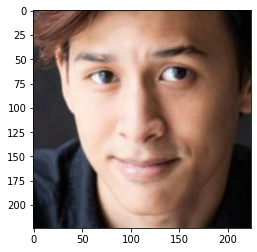

In [ ]:
#folder_dir = "/content/drive/MyDrive/DL/for train/test/thai"
#pic = "TWN_0020.JPG"

img_path = "/content/drive/MyDrive/DL/for train/test/malaysia/malay-75.jpg" #os.path.join(folder_dir,pic)


data_transforms = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      ])


image =  Image.open(img_path)

plt.imshow(image)

image = data_transforms(image)
image = image.unsqueeze(0)



In [ ]:
model = models.resnet18()

num_ftrs = model.fc.in_features
features = list(model.fc.children())[:-1] # Remove last layer
features.extend([nn.Linear(num_ftrs, 256),nn.ReLU(),nn.Dropout(p=0.8),nn.Linear(256,len(class_names)),nn.Softmax(dim=1) ]) # Add our layer with 3 outputs  #
model.fc = nn.Sequential(*features) # Replace the model classifier

weight = torch.load("/content/drive/MyDrive/DL/code/resnet-18/resnet-18_weight_v11.pth")  # init weight
model.load_state_dict(weight)

model.eval()

pred = model(image)

print("Chinese score = {}" .format(pred.data[0][0]) )
print("Malaysia score = {}" .format(pred.data[0][1]) )
print("Thai score = {}" .format(pred.data[0][2]) )

_,pred = torch.max(pred.data,1) 

if pred == 0 :
  print("Predict : chinese")
elif pred == 1 :
  print("Predict : malaysia")
else :
  print("Predict : thai")

Chinese score = 0.9651278853416443
Malaysia score = 0.001317025045864284
Thai score = 0.03355514258146286
Predict : chinese


In [ ]:
model_ft = models.vgg16()

num_ftrs = model_ft.classifier[6].in_features
features = list(model_ft.classifier.children())[:-1] # Remove last layer
features.extend([nn.Linear(num_ftrs, 3)]) # Add our layer with 3 outputs
model_ft.classifier = nn.Sequential(*features) # Replace the model classifier

weight = torch.load("/content/drive/MyDrive/DL/code/vgg-16/vgg-16_weight_v2.pth")  # init weight

model_ft.load_state_dict(weight)

model_ft.eval()

pred = model_ft(image)

print(pred)

_,pred = torch.max(pred.data,1) 

if pred == 0 :
  print("Predict : chinese")
elif pred == 1 :
  print("Predict : malaysia")
else :
  print("Predict : thai")


UnpicklingError: ignored

In [ ]:
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from PIL import Image
import os

In [ ]:
img_path = "/content/drive/MyDrive/DL/dataset/haar_cropface/test/thai/thai-78.jpg"


data_transforms = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.Grayscale(),
      transforms.ToTensor(),
      ])


image =  Image.open(img_path)

image = data_transforms(image)

image = image.unsqueeze(0)

In [ ]:
model = models.resnet18()

num_ftrs = model.fc.in_features
features = list(model.fc.children())[:-1] # Remove last layer
features.extend([nn.Flatten(),nn.Linear(num_ftrs, 256),nn.Dropout(p=0.8),nn.Linear(256,len(class_names)),nn.Softmax(dim=1) ]) # Add our layer with 3 outputs
#features = [nn.Linear(num_ftrs, 256),nn.Dropout(p=0.8),nn.Linear(256,len(class_names)) ]  # Add our layer with 3 outputs
model.fc = nn.Sequential(*features) # Replace the model classifier

#print(model_ft)

pre_layer = list(model.children())
pre_layer.insert(0,nn.Conv2d(1,3,kernel_size=3,stride=1,padding=1,bias=False))# change first layer dim to 1,64 for grayscale
model = nn.Sequential(*pre_layer)

weight = torch.load("/content/drive/MyDrive/DL/code/resnet-18/resnet-18_weight_v4_grayscale.pth")  # init weight

model.load_state_dict(weight)

model.eval()

pred = model(image)

print(pred)

_,pred = torch.max(pred.data,1) 

if pred == 0 :
  print("Predict : chinese")
elif pred == 1 :
  print("Predict : malaysia")
else :
  print("Predict : thai")

tensor([[0.0756, 0.2796, 0.6448]], grad_fn=<SoftmaxBackward>)
Predict : thai
